In [1]:
#imports
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns
%matplotlib inline

from __future__ import division

In [2]:
#Importer la frame

path = '../data/merge.csv'
df = pd.read_csv(path, index_col=0)

#Pour plus de simplicité dans le traitement des codes de département, on rassemble la Corse en un code (20)
df.dep = df.dep.apply(lambda x: x.replace('2A', '20').replace('2B', '20'))

#ligne aberrante à supprimer
df = df[df.l_EG != 198.67]

In [3]:
#on stocke les variables d'entrée dans X et de sortie dans y. yc indique le groupe ayant le score de législatives le + élevé
#p_win stocke le groupe politique ayant eu le score de présidentielle le plus élevé dans le département
X = df[df.columns[:-6]]
p_win = df[df.columns[-12:-6]].idxmax(axis=1)
y = df[df.columns[-6:]]
yc = y.idxmax(axis=1)

In [4]:
#stock dans des cols plutôt non ?
df['p_win'] = p_win
df['l_win'] = yc

In [5]:
groups = ['EG', 'G', 'autre', 'C', 'D', 'ED']
lgroups = ['l_%s' % g for g in groups]
pgroups = ['presid_%s' % g for g in groups]
color = ['#ca0020', '#f4a582', '#b2abd2', '#fee8c8', '#92c5de', '#0571b0']

(4, 16)

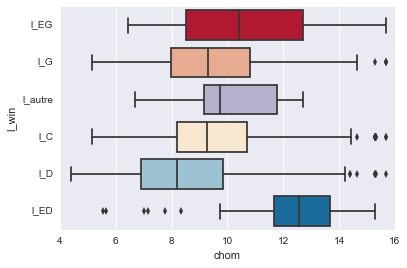

In [6]:
#boxplots du chômage
sns.boxplot(df.chom, df.l_win, order=lgroups, palette=color)
plt.xlim(4,16)

Pour le coup, la répartition des circonscriptions l_ED se démarque vraiment des autres : le groupe ne "remporte" des circonscriptions presque que pour un taux de chômage supérieur à 10% !

In [7]:
#rappelons tout de même le nombre de circonscriptions appartenant à chacun de ses groupes
df.l_win.value_counts()

l_D        1530
l_C         823
l_G         716
l_EG        267
l_ED         46
l_autre      17
Name: l_win, dtype: int64

In [8]:
#en prop
df.l_win.value_counts().apply(lambda x: x / len(df))

l_D        0.450132
l_C        0.242130
l_G        0.210650
l_EG       0.078553
l_ED       0.013533
l_autre    0.005001
Name: l_win, dtype: float64

Seulement 46 circonscriptions "remportées" par l'extrême-droite dans notre jeu de données, c'est-à-dire 1,35% des situations. Finalement si on veut tirer des conclusions significatives, on ferait mieux de dessiner une droite score en fonction de chômage.

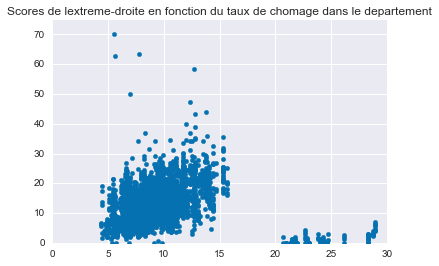

In [11]:
#la corrélation semble exister
plt.scatter(df.chom, df.l_ED, color=color[5])
plt.ylim(0,75)
plt.xlim(0,30)
plt.title("Scores de lextreme-droite en fonction du taux de chomage dans le departement")
plt.savefig('./plots/ED_chom.png')

#Les taux de chômage extrêmes correspondent aux outre-mer. Peut-être qu'une variable catégorielle pourrait les indiquer
#Ainsi des arbres de décision traiteraient peut-être le taux de chômage différemment selon qu'il provient d'outre-mer
#ou non ?

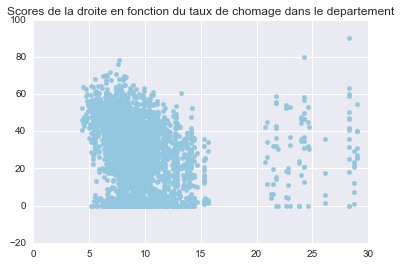

In [12]:
#comparaison avec la droite : corrélation inverse
plt.scatter(df.chom, df.l_D, color=color[4])
#plt.ylim(0,75)
plt.xlim(0,30)
plt.title("Scores de la droite en fonction du taux de chomage dans le departement")
plt.savefig('./plots/D_chom.png')

In [13]:
#L'âge peut-il nous apporter quelque chose ?
d = {}

#stock chaque groupe gagnant
for g in lgroups:
    d[g] = df[df.l_win == g]

In [14]:
ages = ['age_%d' % i for i in range(1,5)]

age_means = {}

#stock chaque moyenne de prop d'age par groupe
for g in lgroups:
    for a in ages:
        age_means[(g, a)] = d[g][a].mean()

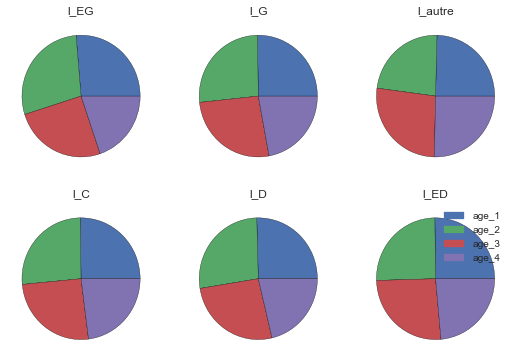

In [24]:
#plot

f, axarr = plt.subplots(2,3)
f.set_size_inches(9,6)

for i in range(6):
    plt.sca(axarr.flat[i])
    plt.pie([age_means[(lgroups[i], a)] for a in ages], colors=sns.color_palette())
    plt.title(lgroups[i])
    
patches = [mpatches.Patch(color=sns.color_palette()[i], label=ages[i]) for i in range(4)]
plt.legend(handles=patches)

En moyenne la différence n'est pas flagrante. Peut-être qu'on peut aller plus loin et plot les répartitions complètes ?

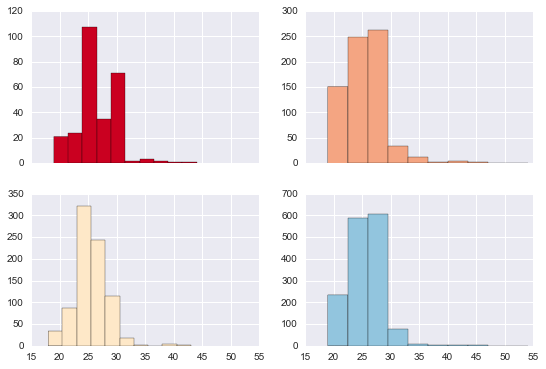

In [28]:
#Puisque l'échantillon  des circonscriptions "gagnées" par ED ou autres est non représentatif
mainlg = ['l_EG', 'l_G', 'l_C', 'l_D']
mainc = color[:2] + color[3:-1]

f, axarr = plt.subplots(2,2, sharex=True)
f.set_size_inches(9,6)
for i in range(4):
    plt.sca(axarr.flat[i])
    plt.hist(d[mainlg[i]].age_1, color=mainc[i])

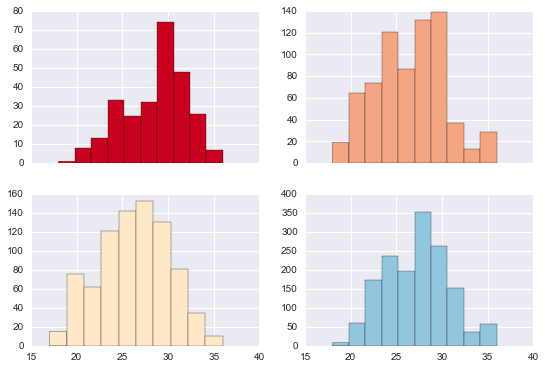

In [29]:
f, axarr = plt.subplots(2,2, sharex=True)
f.set_size_inches(9,6)
for i in range(4):
    plt.sca(axarr.flat[i])
    plt.hist(d[mainlg[i]].age_2, color=mainc[i])

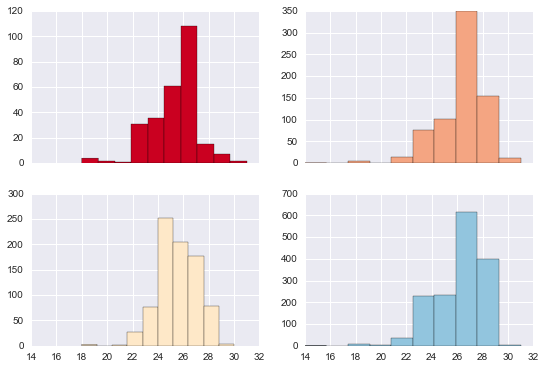

In [30]:
f, axarr = plt.subplots(2,2, sharex=True)
f.set_size_inches(9,6)
for i in range(4):
    plt.sca(axarr.flat[i])
    plt.hist(d[mainlg[i]].age_3, color=mainc[i])

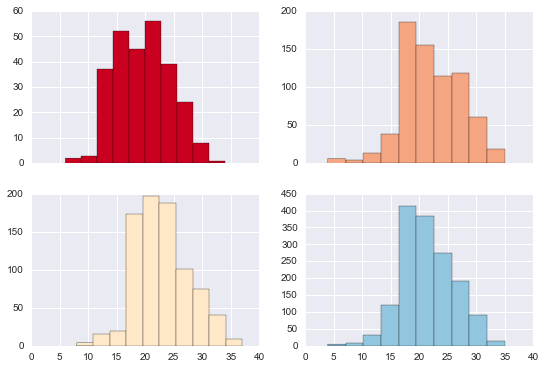

In [31]:
f, axarr = plt.subplots(2,2, sharex=True)
f.set_size_inches(9,6)
for i in range(4):
    plt.sca(axarr.flat[i])
    plt.hist(d[mainlg[i]].age_4, color=mainc[i])

Finalement l'âge ne semble pas varier d'une circonscription appartenant à un groupe ou à un autre. Peut-être qu'on peut se pencher directement sur des scatter points age v/s score ?

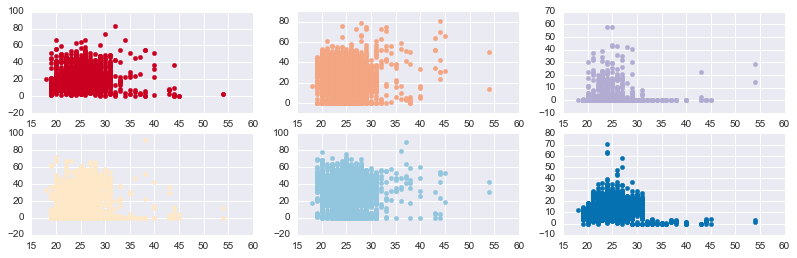

In [34]:
f, axarr = plt.subplots(2,3)

f.set_size_inches(13.5,4)

for i in range(6):
    plt.sca(axarr.flat[i])
    plt.scatter(df.age_1, df[lgroups[i]], color=color[i])

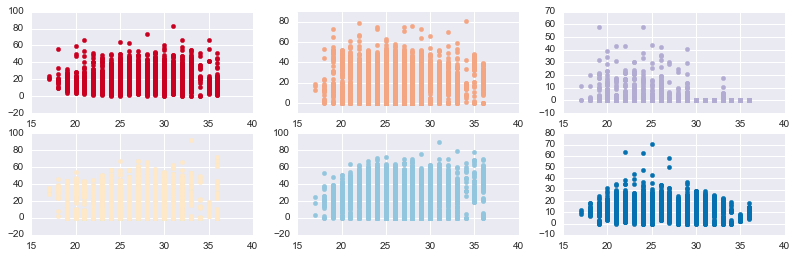

In [51]:
f, axarr = plt.subplots(2,3)

f.set_size_inches(13.5,4)

for i in range(6):
    plt.sca(axarr.flat[i])
    plt.scatter(df.age_2, df[lgroups[i]], color=color[i])

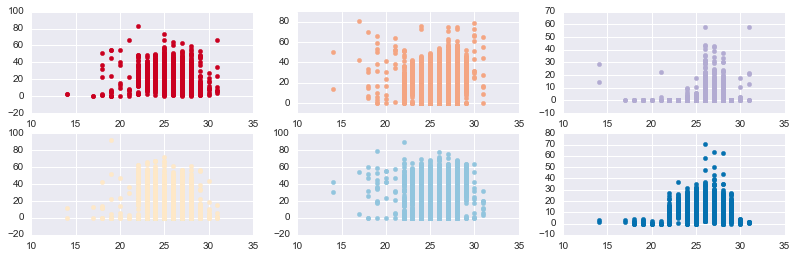

In [50]:
f, axarr = plt.subplots(2,3)

f.set_size_inches(13.5,4)

for i in range(6):
    plt.sca(axarr.flat[i])
    plt.scatter(df.age_3, df[lgroups[i]], color=color[i])

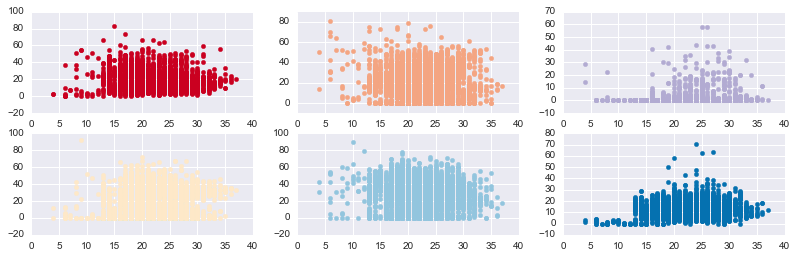

In [49]:
f, axarr = plt.subplots(2,3)

f.set_size_inches(13.5,4)

for i in range(6):
    plt.sca(axarr.flat[i])
    plt.scatter(df.age_4, df[lgroups[i]], color=color[i])